In [1]:
import numpy as np
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model 
from sklearn.metrics import confusion_matrix 
import tensorflow_datasets as tfds


In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [3]:
builder = tfds.builder('tf_flowers')
info = builder.info
info


tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/root/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [4]:
train_data = tfds.load(name = "tf_flowers",split="train[:80%]",as_supervised=True,)
test_data = tfds.load(name = "tf_flowers",split="train[80%:]",as_supervised=True,)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [5]:
print("Total Number of classes: ",info.features['label'].num_classes)
print("Total Number of training: ",len(train_data))
print("Totel Number of testing: ",len(test_data))

Total Number of classes:  5
Total Number of training:  2936
Totel Number of testing:  734


In [6]:
labell = {
    0 : "daisy",
    1 : "dandelion",
    2 : "Tulip",
    3 : "Sunflowers",
    4 : "roses"
}

In [7]:
for i, example in enumerate(train_data.take(5)):
    print(f'Image {i+1} shape: {example[0].shape} label: {example[1]}')

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


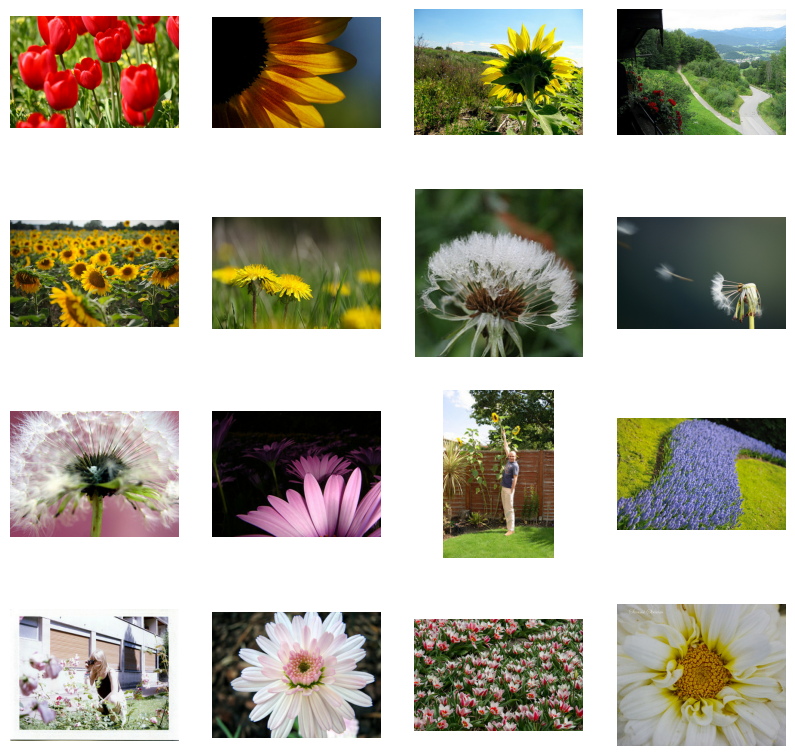

In [8]:
temp = 0
plt.figure(figsize=(10,10))
for image, label in train_data.take(16):
    temp+=1
    plt.subplot(4,4,temp)
    plt.imshow(image)
    plt.axis(False)

In [9]:
WIDTH = 224
HEIGHT = 224

In [10]:
def format_image(image):
    image = tf.image.resize(image,(WIDTH,HEIGHT))/255.0
    return image 

In [11]:
train_x =  []
train_y = []

for image, label in train_data.map(lambda x, y: (x, y)):  
    train_x.append(format_image(image))
    train_y.append(label)
train_x = np.array(train_x)
train_y = np.array(train_y)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [12]:
test_x =  []
test_y = []

for image, label in test_data.map(lambda x, y: (x, y)):  
    test_x.append(format_image(image))
    test_y.append(label)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [13]:
print("Shape of Train Data: ",train_x.shape,train_y.shape)
print("Shape of Test Data: ",test_x.shape,test_y.shape)

Shape of Train Data:  (2936, 224, 224, 3) (2936,)
Shape of Test Data:  (734, 224, 224, 3) (734,)


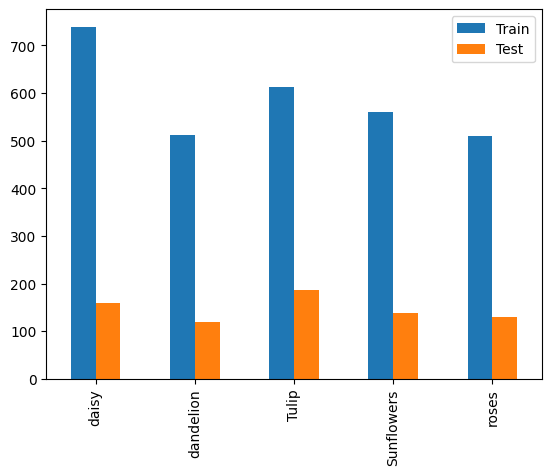

In [14]:
_,train_count = np.unique(train_y,return_counts=True)
_,test_count = np.unique(test_y,return_counts=True)
pd.DataFrame({'Train':train_count,'Test':test_count},index=labell.values()).plot.bar()
plt.show()

In [15]:
x_val = train_x[2500:]
y_val = train_y[2500:].reshape(436,1)
x_train = train_x[:2500,]
y_train = train_y[:2500].reshape(2500,1)

In [16]:
print("Shape of Train Data: ",x_train.shape,y_train.shape)
print("Shape of Test Data: ",x_val.shape,y_val.shape)

Shape of Train Data:  (2500, 224, 224, 3) (2500, 1)
Shape of Test Data:  (436, 224, 224, 3) (436, 1)


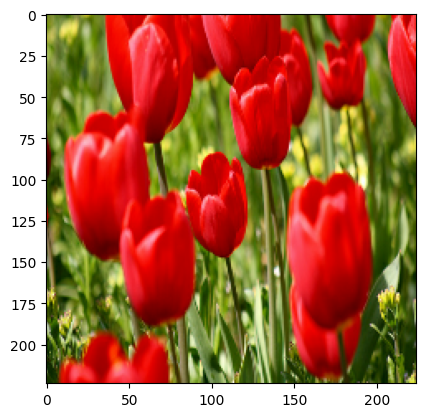

In [17]:
plt.imshow(x_train[0])

In [18]:
model = tf.keras.Sequential()
model.add(Conv2D(64,kernel_size= (3,3),padding= 'same',activation='relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides= (2,2)))

model.add(Conv2D(128,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides= (2,2)))

model.add(Conv2D(256,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2),strides= (2,2)))

model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2),strides= (2,2)))

model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2),strides= (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['acc'])

In [21]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
79/79 [==============================] - 69s 537ms/step - loss: 1.5227 - acc: 0.4508 - val_loss: 2.4481 - val_acc: 0.2408
Epoch 2/10
79/79 [==============================] - 40s 510ms/step - loss: 1.0395 - acc: 0.5912 - val_loss: 4.4296 - val_acc: 0.2408
Epoch 3/10
79/79 [==============================] - 40s 512ms/step - loss: 0.8842 - acc: 0.6556 - val_loss: 4.0721 - val_acc: 0.2408
Epoch 4/10
79/79 [==============================] - 40s 510ms/step - loss: 0.8223 - acc: 0.6832 - val_loss: 3.5387 - val_acc: 0.2408
Epoch 5/10
79/79 [==============================] - 40s 510ms/step - loss: 0.7481 - acc: 0.7244 - val_loss: 3.2503 - val_acc: 0.2592
Epoch 6/10
79/79 [==============================] - 40s 506ms/step - loss: 0.6735 - acc: 0.7424 - val_loss: 3.2129 - val_acc: 0.3601
Epoch 7/10
79/79 [==============================] - 41s 516ms/step - loss: 0.6494 - acc: 0.7608 - val_loss: 1.4007 - val_acc: 0.5092
Epoch 8/10
79/79 [==============================] - 41s 515ms/step - 

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

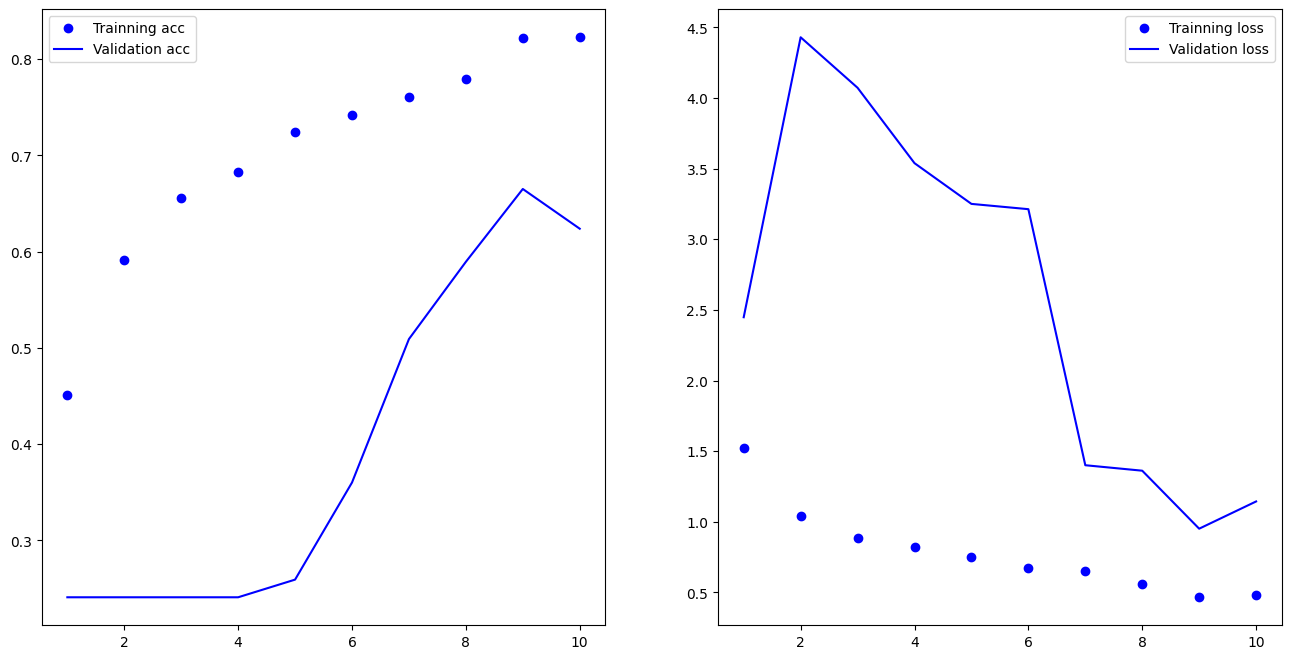

In [24]:
epochs = range(1,len(acc) + 1)
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs,acc,'bo',label='Trainning acc')
ax1.plot(epochs,val_acc,'b',label='Validation acc')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs,loss,'bo',label='Trainning loss')
ax2.plot(epochs,val_loss,'b',label='Validation loss')
ax2.legend()

1/1 [==============================] - 0s 37ms/step
Predict:  Tulip
Label:  Tulip


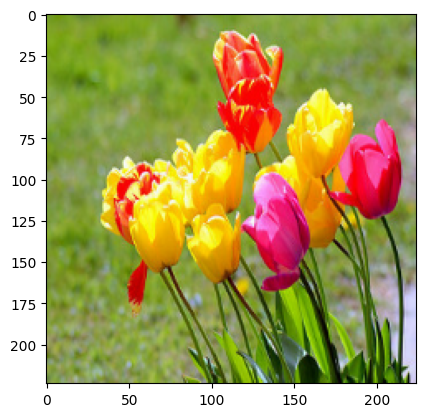

In [36]:
print("Predict: ",labell[np.argmax(model.predict(test_x[100:101]))])
print("Label: ",labell[test_y[100]])
plt.imshow(test_x[100])

In [27]:
model.evaluate(test_x,test_y.reshape(734,1))

23/23 [==============================] - 7s 286ms/step - loss: 0.9732 - acc: 0.6839


[0.9732300043106079, 0.6839237213134766]

Khả năng đang bị overfitting chắc phải sử dụng các biện pháp regularition như data augmentation hay dropout hay l1,l2

Ở trên khi thay đổi lr << thì mô hình đã cải thiện hơn rất nhiều ->> đáng lưu ý